In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

df2014 = pd.read_csv('../data/master_2014.csv')
df2013 = pd.read_csv('../data/master_2013.csv')

/playpen/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (10,11,13,25,87,88,104) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/playpen/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (10,11,13,25,61,62,63,68,87,88,104,114) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
# Apply lambda expressions to filter NaNs and infs

# First float all values in throughput and latency columns
df2014['ThroughputData.Mean'] = df2014['ThroughputData.Mean'].apply(lambda x: np.float64(x))
df2014['LatencyData.Mean'] = df2014['LatencyData.Mean'].apply(lambda x: np.float64(x))
df2014['ThroughputData.Med'] = df2014['ThroughputData.Med'].apply(lambda x: np.float64(x))
df2014['LatencyData.Med'] = df2014['LatencyData.Med'].apply(lambda x: np.float64(x))

# Set NaNs and infs to -1
df2014['ThroughputData.Mean'] = df2014['ThroughputData.Mean'].apply(lambda x: -1 if np.isnan(x) or np.isinf(x) else x)
df2014['LatencyData.Mean'] = df2014['LatencyData.Mean'].apply(lambda x: -1 if np.isnan(x) or np.isinf(x) or x > 1000 else x)
df2014['ThroughputData.Med'] = df2014['ThroughputData.Med'].apply(lambda x: -1 if np.isnan(x) or np.isinf(x) else x)
df2014['LatencyData.Med'] = df2014['LatencyData.Med'].apply(lambda x: -1 if np.isnan(x) or np.isinf(x) or x > 1000 else x)

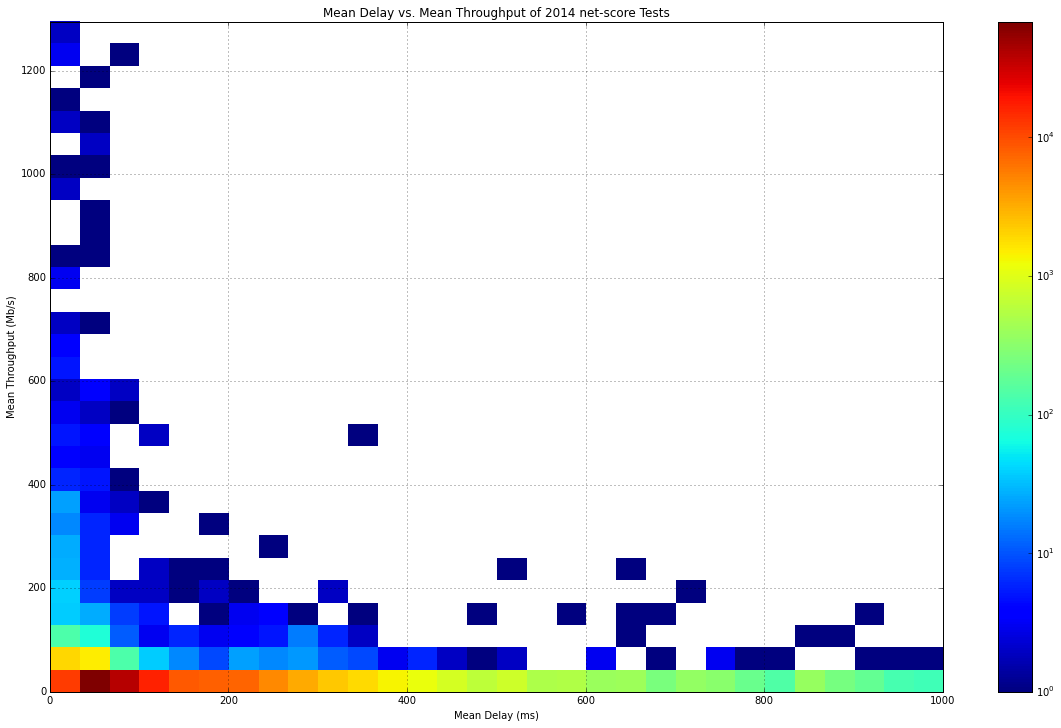

In [9]:
from matplotlib.colors import LogNorm

x = df2014['LatencyData.Mean']
y = df2014['ThroughputData.Mean']

r = [[0,np.max(x)],[0,np.max(y)]]
fig, ax = plt.subplots(1,1,figsize=(20,12))
im = ax.hist2d(x, y, bins=30, range=r, norm=LogNorm()) #, cmap=mpl.cm.YlOrRd)
ax.grid(True)
fig.colorbar(im[3],ax=ax)

plt.title('Mean Delay vs. Mean Throughput of 2014 net-score Tests')
plt.xlabel('Mean Delay (ms)')
plt.ylabel('Mean Throughput (Mb/s)')
plt.show()

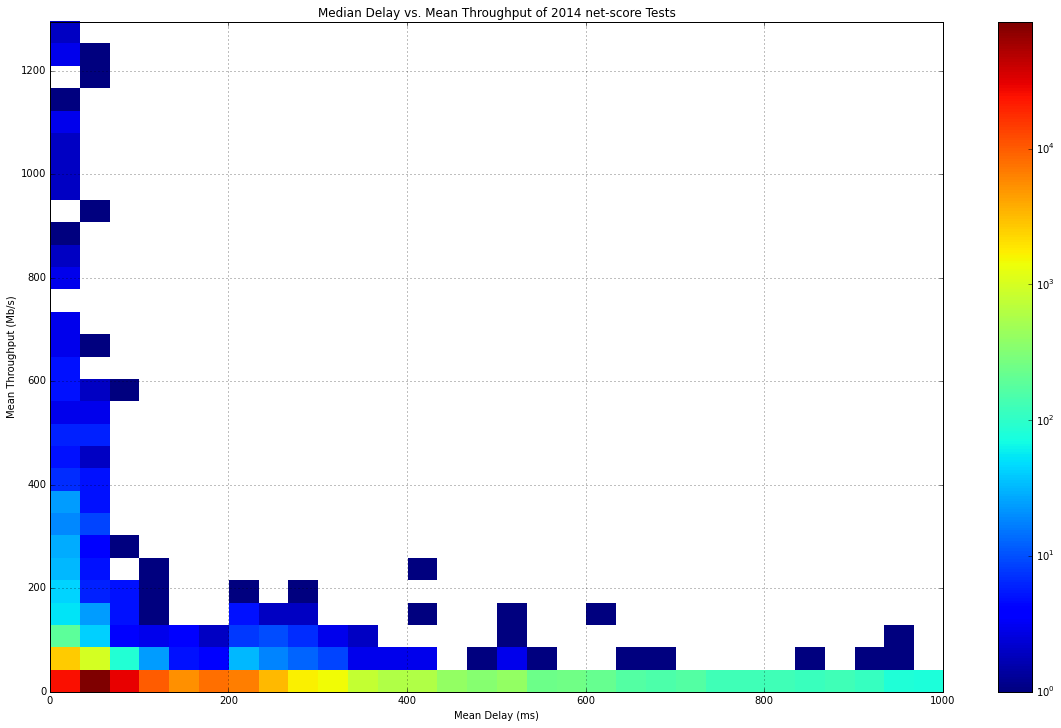

In [15]:
x = df2014['LatencyData.Med']
y = df2014['ThroughputData.Mean']

r = [[0,np.max(x)],[0,np.max(y)]]
fig, ax = plt.subplots(1,1,figsize=(20,12))
im = ax.hist2d(x, y, bins=30, range=r, norm=LogNorm())
ax.grid(True)
fig.colorbar(im[3],ax=ax)

plt.title('Median Delay vs. Mean Throughput of 2014 net-score Tests')
plt.xlabel('Mean Delay (ms)')
plt.ylabel('Mean Throughput (Mb/s)')
plt.show()

In [ ]:
tp = df2014['LatencyData.Med'].values
clean = []
for i in tp:
    if i > 0:
        clean.append(i)

In [ ]:
print min(clean)
print max(clean)

In [ ]:
test = pd.read_csv('../data/master_2014.csv')

In [ ]:
print max(test['LatencyData.Med'])